## HW 4
## Alex Humble
## Grading
This homework is due March 21, 2019 by 4:00pm Utah time. By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for:

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model evaluation: Did you evaluate your model on multiple metrics? Where does your model do well? Where could it be improved? How are the metrics different?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results?
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("/Users/alexhumble/Desktop/Train.csv",
                   low_memory =False)
test = pd.read_csv("/Users/alexhumble/Desktop/Test.csv",
                  low_memory =False)

In [3]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [4]:
train.Target.describe

<bound method NDFrame.describe of 0       4
1       4
2       4
3       4
4       4
5       4
6       4
7       4
8       4
9       4
10      4
11      4
12      4
13      4
14      4
15      4
16      4
17      4
18      4
19      4
20      4
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      4
       ..
9527    4
9528    4
9529    4
9530    4
9531    4
9532    4
9533    4
9534    3
9535    1
9536    2
9537    2
9538    2
9539    2
9540    2
9541    2
9542    2
9543    2
9544    2
9545    4
9546    4
9547    4
9548    4
9549    4
9550    2
9551    2
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64>

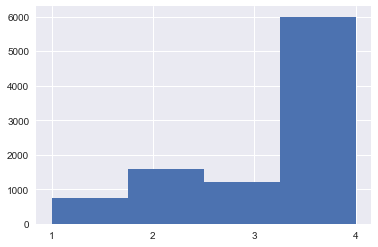

In [5]:
#Check the balance of the distribution between the different levels of poverty
plot = train['Target'].unique()
train['Target'].hist(bins=len(plot))
plt.xticks(plot)
plt.show()

It is clear that we are with imbalanced categories. The vast majority of individuals belong to non-vulnerable households (4). This group is oversampled in our dataset

In [6]:
#handling missing data
nan_train = []
for aa in train:
    if train[aa].isnull().any() == True:
        nan_train.append(aa)
nan_train

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

Text(0.5, 1.0, 'Percent missing data by feature')

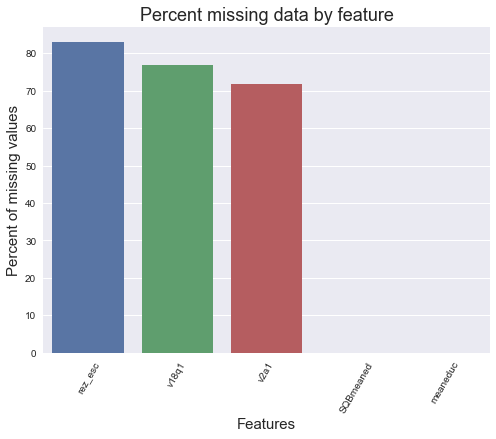

In [7]:

#Calculate the % of missing data in each column where data is missing
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head(30)

#Graph missing data as histogram
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='60')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=18)


Years behind in school, tablet ownership, and monthly rent payments are the columns that are missing the majority of their data. The NAN values in these columns could be informative and thus the ensuing sections will be investigating each column and what to do with the NAN values found therein

In [8]:
#tablet ownership
train['v18q1'] = train['v18q1'].fillna(0)

v18q1 is a variable that indicates how many tablets are found in the household. The NAN value simply means the family does not own a tablet. Thus we can fill the NAN values with 0

In [9]:
rica = [train]
for bb in rica:
   print(train[['age','rez_esc']].groupby('age').mean().head(25))

      rez_esc
age          
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7    0.000000
8    0.036765
9    0.071429
10   0.167883
11   0.195489
12   0.302158
13   0.266234
14   0.288732
15   0.686275
16   1.116667
17   1.457143
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN


In [10]:
#As you can see above, between ages 7 and 17 is when the rez_esc column takes on a value
# If individual is within ages 7-17 , use mean
train.loc[((train['age'] > 6) & (train['age'] < 17)) & (train['rez_esc'].isnull()), 'rez_esc'] = 0

# If individual is older or younger, then just set it to 0
train['rez_esc'] = train['rez_esc'].fillna(0)

In [11]:
# If people own their own home then they do not need to make rent payments, this is denoted by tipovivi1 =1 
train.loc[(train['tipovivi1']==1), 'v2a1']=0

# All other individuals are fine with the mean value
def mean_it(feature):
    mean_var = train[feature].mean()
    train[feature] = train[feature].fillna(mean_var)
    
mean_it('v2a1')

We have now dealt with all 5 columns that contained missing values

### Fixing errors - incorrect targets

In [12]:
#Some adults in the households are missing education values, 
#the proportion is very small so we will just fill those in with the mean values of the columns
mean_it('SQBmeaned')
mean_it('meaneduc')

In [13]:
# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]

print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In the case of this competition, we look at the head of the household and not so much the individuals, so we can align the the target for individuals in the same household by giving them the same value as the HoH

In [14]:
for household in not_equal.index:
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

    
#check_errors()  # Double check that there are now no families with different targets

Now all families have the same classification in the target. Before, it did not make sense that members of the same household could live in different conditions of poverty, so we have fixed that issue

## Feature Engineering

In [15]:
#creating a feature that measures home quality
train['quality'] = train['cielorazo'] + (1- train['pisonotiene']) + (1-train['abastaguano']) + (1- train['noelec'])
+ (1- train['sanitario1']) + (1-train['energcocinar1']) + train['epared3']

0       2
1       2
2       2
3       3
4       3
5       3
6       3
7       2
8       2
9       2
10      2
11      3
12      3
13      3
14      3
15      2
16      2
17      2
18      2
19      3
20      3
21      2
22      2
23      2
24      2
25      2
26      2
27      3
28      3
29      3
       ..
9527    3
9528    3
9529    3
9530    3
9531    3
9532    3
9533    3
9534    2
9535    2
9536    2
9537    2
9538    2
9539    2
9540    2
9541    2
9542    2
9543    2
9544    2
9545    2
9546    2
9547    2
9548    2
9549    2
9550    3
9551    3
9552    2
9553    2
9554    2
9555    2
9556    2
Length: 9557, dtype: int64

Text(0.5, 1.0, 'Home Quality')

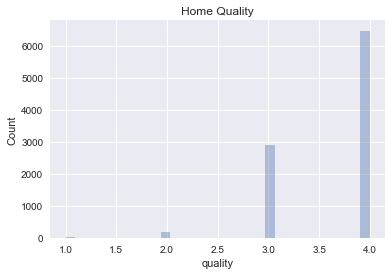

In [16]:
sns.distplot(train.quality, kde=False) #kde is kernel density estimate. 
plt.ylabel('Count')
plt.title('Home Quality')

In the same way that we can group together home quality variables into one feature, we can group together per capita variables into one feature

In [17]:
def pc(feature):
    pc = train[feature] / train['tamviv']
    return pc


train['tablet_pc'] = pc('v18q1')
train['refrig_pc'] = pc('refrig')
train['television_pc'] = pc('television')
train['qmobilephone_pc'] = pc('qmobilephone')
train['computer_pc'] = pc('computer')

In order to understand the relationships and correlation between variables, it is helpful to separate the variables out by individual and household by type

In [18]:
# Individual Data
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']
ind_cont = ['rez_esc', 'escolari', 'age', 'tablet_pc', 'refrig_pc', 'television_pc', 'qmobilephone_pc','computer_pc']
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

sqr_var = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [19]:
#dropping the id prepares us for cross validation
train = train.drop(['Id', 'idhogar'], axis=1)

In [20]:
#I followed along on Will Koehrsen's kernel - this part is from his thread
#This will enable me to plot categorical variables against each other by taking two features and plotting them against
#each other. This will be helpful in spotting outliers and potentially understanding what needs to be done with them
#whether we keep them or how we work around them is influenced by what we are told here


def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize=18,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 13)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}", fontsize=20); plt.ylabel(f"{y}", fontsize=15); plt.title(f"{y} vs {x}", fontsize=18);

Text(0.5, 1.0, 'Poverty Level vs House Quality')

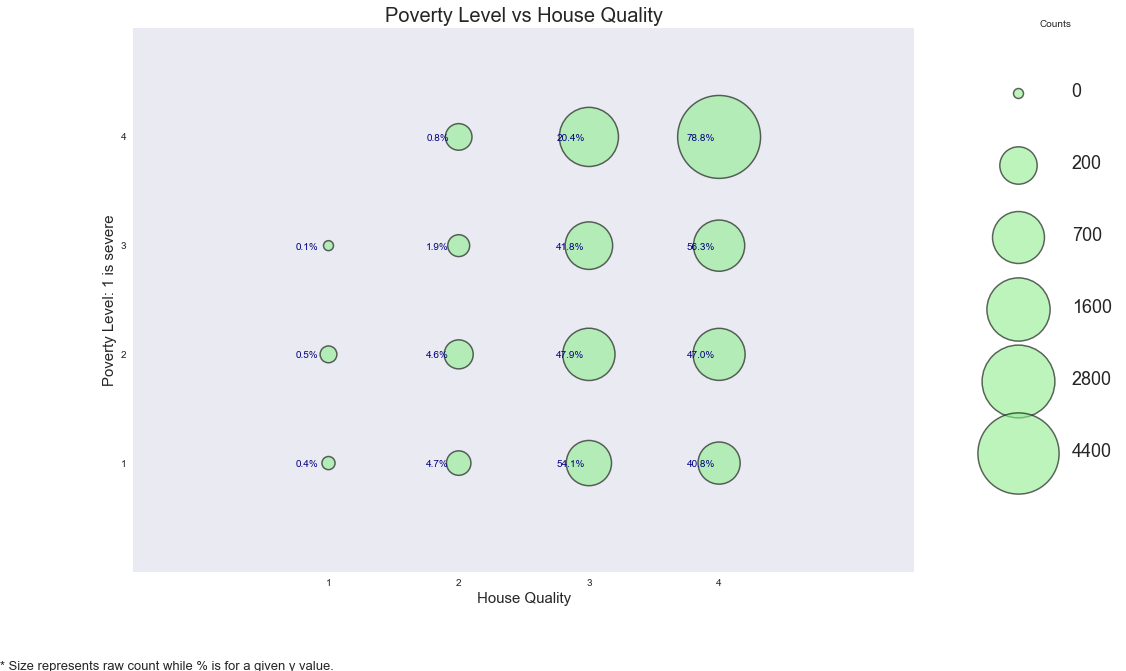

In [21]:
plot_categoricals('quality', 'Target', train)
plt.xlabel('House Quality', fontsize=15)
plt.ylabel('Poverty Level: 1 is severe', fontsize=15)
plt.title('Poverty Level vs House Quality', fontsize=20)

In [22]:
train = train.drop(train[(train['Target']>=3) & (train['quality']<=4)].index) 
train = train.drop(train[(train['Target']==2) & (train['quality']<2)].index)

## Checking Correlation Between Variables
I am noticing a big time error here, but the more I restart and try, I cannot find what is causing everything to be so off. I have followed along on several different kernels and walk throughs on Kaggle and cant seem to find what is causing mine to be so off

Text(0.5, 1.0, 'Variables Correlated With Poverty Level')

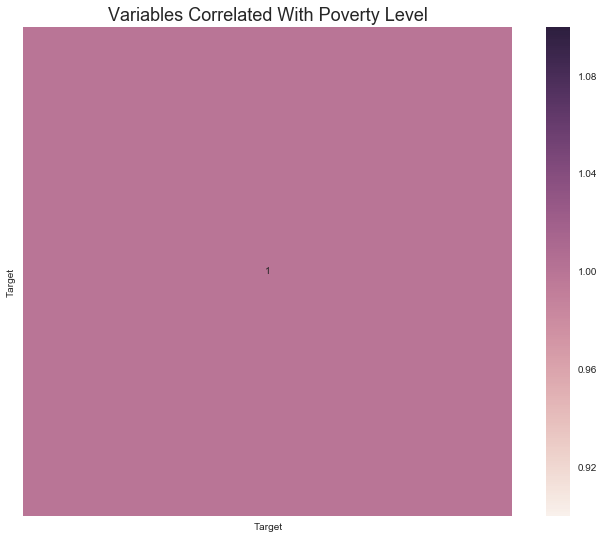

In [23]:
corr_train = train.corr()
highest_corr = corr_train.index[abs(corr_train["Target"])>0.29]
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train[highest_corr].corr(), square = True, annot = True)
plt.title('Variables Correlated With Poverty Level', fontsize=18)

This is clearly showing something is wrong, but I cant find where the problem actually is

## Obtaining Dummy Variables

In [24]:
#boolean columns need to be made into a string in order to make dummy variables
for col in ind_bool:
    train[col] = pd.get_dummies(train[col].astype(str))

for col in hh_bool:
    train[col] = pd.get_dummies(train[col].astype(str))

In [25]:
mapping = {"yes": 1, "no": 0}
train['dependency'] = train['dependency'].replace(mapping).astype(np.float64)
train['edjefa'] = train['edjefa'].replace(mapping).astype(np.float64)
train['edjefe'] = train['edjefe'].replace(mapping).astype(np.float64)

In [26]:
# Exclude Target from training data set

Target = train['Target']
train = train.drop(['Target'], axis=1)

## Fixing Skewness

In [27]:
from scipy.stats import norm, skew

num_feat = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[num_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]
print('There are {} variables to transform'.format(skewness.shape[0]))


Skew in numerical features: 

There are 146 variables to transform


In [28]:
from scipy.special import boxcox1p
lmbda = .15  # Hyperperameter to change around

for var in skewness.index:
    train[var] = boxcox1p(train[var], lmbda)

In [29]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_train_df = pd.DataFrame(scaler.fit_transform(train))
scaled_train_df.columns = train.columns

## Modeling

In [30]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_train_df, Target, test_size=.33, random_state=42)

In [31]:
# again from Will Koehrsen - this time for code for confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [32]:
# Determines f1 score given a model and a confusion matrix
from sklearn.metrics import accuracy_score, f1_score
def give_f1(model):
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    y_pred_train2 = list(y_pred_train)
    y_train2 = list(y_train)


    y_pred_test2 = list(y_pred_test)
    y_test2 = list(y_test)
    
    f1 = f1_score(y_test2, y_pred_test2, average='macro') 
    print(f1)
    
    # creating a confusion matrix 
    model_predictions = model.predict(X_test)  
    cm = confusion_matrix(y_test, model_predictions) 

    cm = confusion_matrix(y_test, y_pred_test2)

    plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                          title = 'Poverty Confusion Matrix')

## Logistic Classifier

In [33]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

Text(0, 0.5, 'Feature')

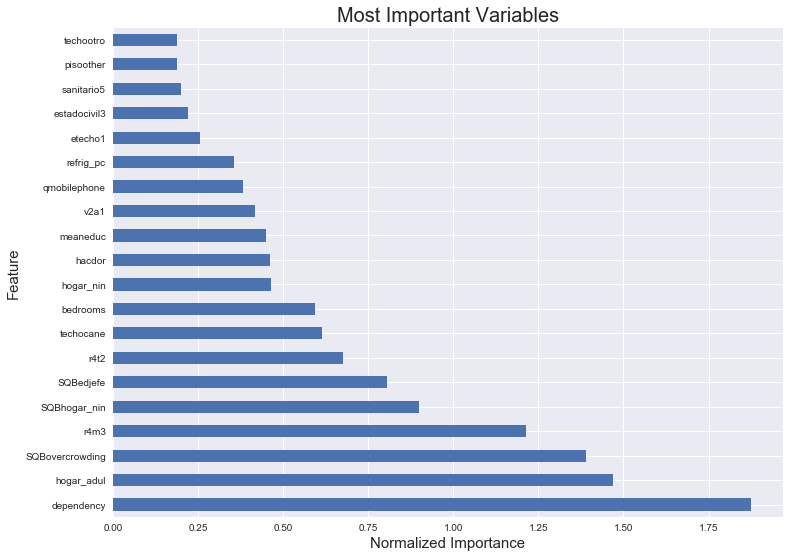

In [34]:
feature_names = list(scaled_train_df.columns)
feat_importances = pd.Series(logreg.coef_[0], index=scaled_train_df.columns)
plt.subplots(figsize=(12,9))

fig = feat_importances.nlargest(20).plot(kind='barh')
plt.title('Most Important Variables', fontsize=20)

plt.xlabel('Normalized Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)

In [35]:
print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))

Train acc: 0.75208734746307
Test acc: 0.7079530638852672


Shows accuracy of our model

In [36]:
y_pred_test2 = list(y_pred_test)
y_test2 = list(y_test)

In [37]:
f1_score(y_test2, y_pred_test2, average='macro')

0.6260230557587155

## F1, Precision, and Recall
As shown in class, the following graph deals with the change in precision, recall and f1

In [38]:
from sklearn.metrics import precision_recall_fscore_support
train_prediction_probabilities = logreg.predict_proba(X_train)
test_prediction_probabilities = logreg.predict_proba(X_test)

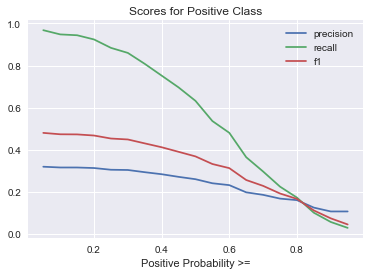

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precisions, recalls, f1s = [], [], []
cutoffs = np.arange(0.05, 1, 0.05)
for cutoff in cutoffs:
    binary_test_predictions = [x[1] >= cutoff for x in test_prediction_probabilities]
    p, r, f1, s = precision_recall_fscore_support(y_test, binary_test_predictions)
    precisions.append(p[1])
    recalls.append(r[1])
    f1s.append(f1[1])
    
plt.plot(cutoffs, precisions, label='precision')
plt.plot(cutoffs, recalls, label='recall')
plt.plot(cutoffs, f1s, label='f1')
plt.xlabel("Positive Probability >=")
plt.title("Scores for Positive Class")
plt.legend()

Confusion matrix, without normalization
[[ 92 158]
 [ 66 451]]


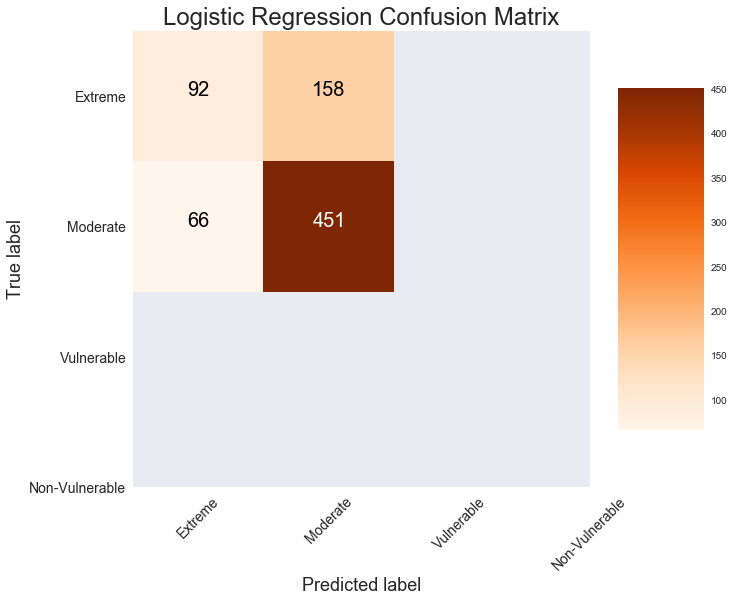

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test2)

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Logistic Regression Confusion Matrix')

## Logistic Regression

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [42]:
def gridsearching(model):
    model.fit(X_train, y_train)
    print("Best Params: {}".format(model.best_params_))
    y_pred_train = model.predict(X_train)
    print("Train F1: {}".format(f1_score(y_train, y_pred_train, average="macro")))
    print("Test Classification Report:")
    y_pred_test = model.predict(X_test)
    print(classification_report(y_test, y_pred_test))
    print("Train Accuracy: {}\tTest accuracy: {}".format(accuracy_score(y_train, y_pred_train),
                                                     accuracy_score(y_test, y_pred_test)))

In [43]:
logreg = LogisticRegression()
model = GridSearchCV(logreg, {'penalty': ['l1', 'l2']})
gridsearching(model)

Best Params: {'penalty': 'l2'}
Train F1: 0.6942896964271181
Test Classification Report:
             precision    recall  f1-score   support

          1       0.58      0.37      0.45       250
          2       0.74      0.87      0.80       517

avg / total       0.69      0.71      0.69       767

Train Accuracy: 0.75208734746307	Test accuracy: 0.7079530638852672


0.6260230557587155
Confusion matrix, without normalization
[[ 92 158]
 [ 66 451]]


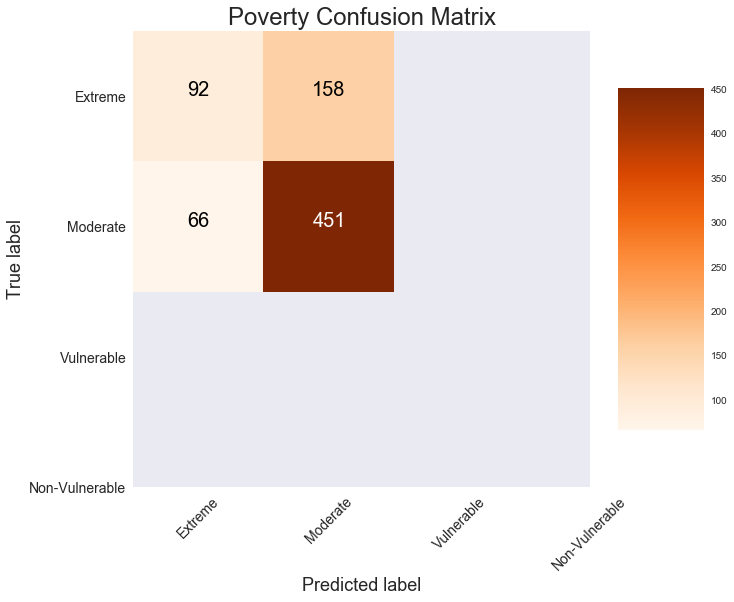

In [44]:
logreg = LogisticRegression(penalty='l2')
give_f1(logreg)

## SVM

0.6424242424242425
Confusion matrix, without normalization
[[104 146]
 [ 75 442]]


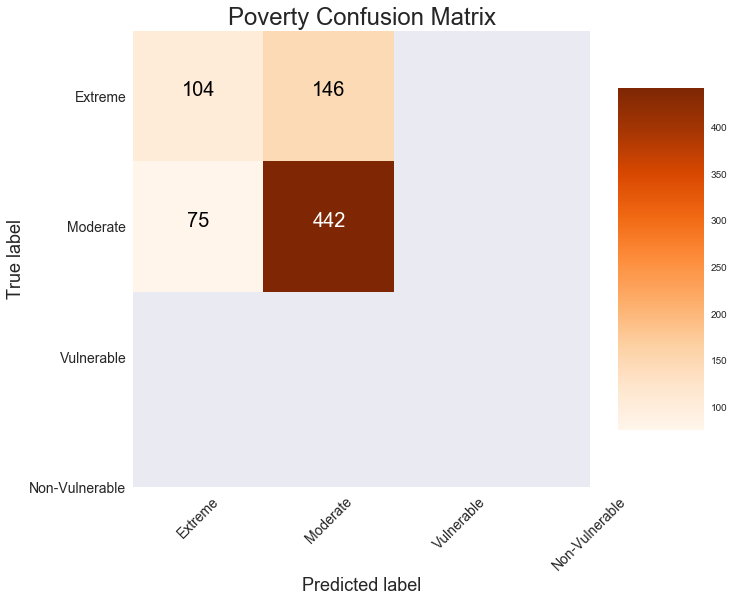

In [45]:
from sklearn import svm
SVM = svm.LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

give_f1(SVM)

## Random Forest 

In [46]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier()
model = GridSearchCV(Random_Forest, {'max_depth': [4,5,6], 'n_estimators': [9,10,11,12]}, scoring="f1_macro")
gridsearching(model)

/Users/alexhumble/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Best Params: {'max_depth': 6, 'n_estimators': 10}
Train F1: 0.719826208680143
Test Classification Report:
             precision    recall  f1-score   support

          1       0.92      0.32      0.48       250
          2       0.75      0.99      0.85       517

avg / total       0.81      0.77      0.73       767

Train Accuracy: 0.7964033397559409	Test accuracy: 0.7705345501955672


0.641773988393354
Confusion matrix, without normalization
[[ 74 176]
 [ 12 505]]


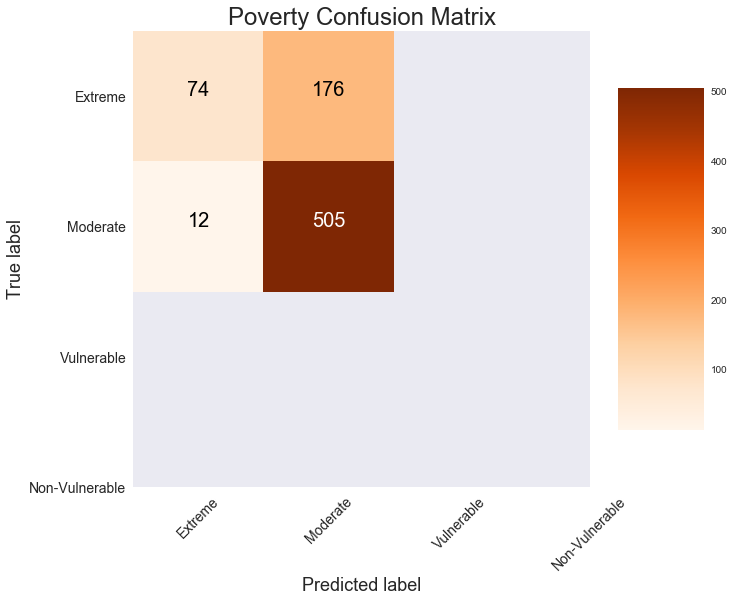

In [47]:
Random_Forest = RandomForestClassifier(max_depth = 6, n_estimators=11)
give_f1(Random_Forest)

## Decision Tree

0.6305535949333283
Confusion matrix, without normalization
[[ 77 173]
 [ 29 488]]


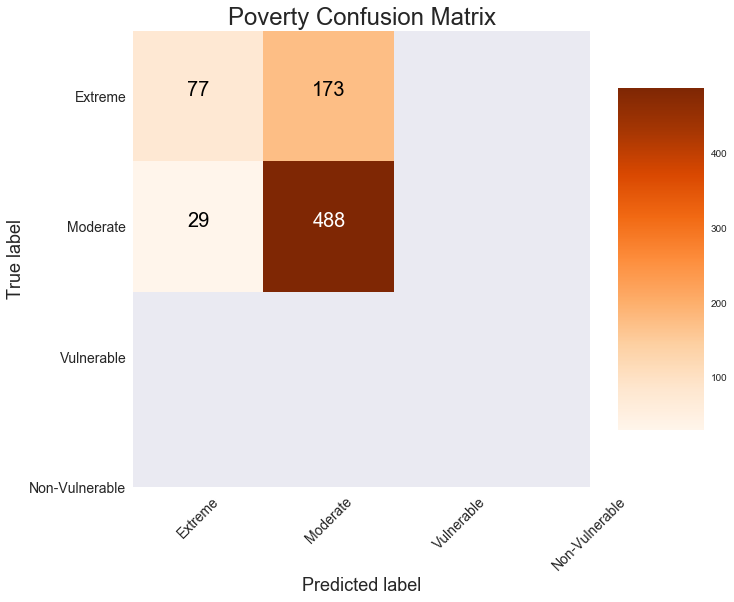

In [48]:
from sklearn.tree import DecisionTreeClassifier 
Decision_Tree = DecisionTreeClassifier(max_depth = 5)
give_f1(Decision_Tree)

## K Nearest Neighbors

0.80932953132997
Confusion matrix, without normalization
[[214  36]
 [100 417]]


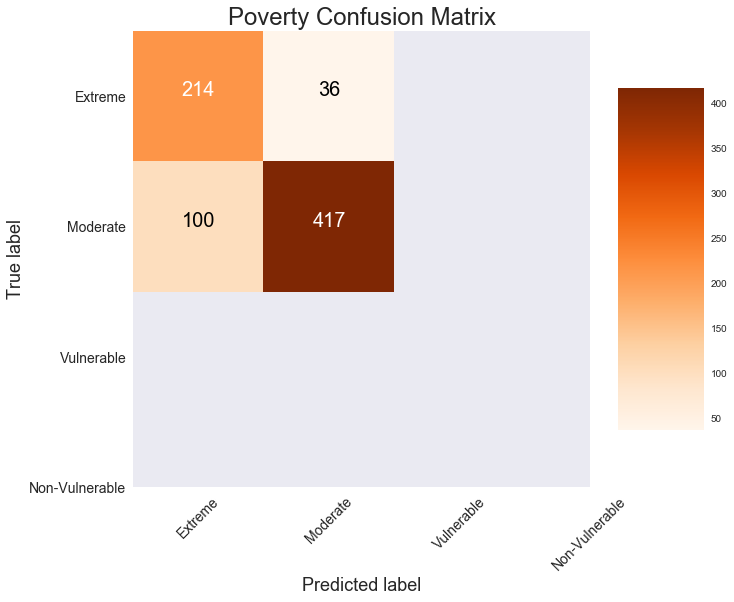

In [49]:
from sklearn.neighbors import KNeighborsClassifier 

KNearest = KNeighborsClassifier(n_neighbors=4)
give_f1(KNearest)

I cannot locate where the issue is in my data cleaning/categorical variable fixing and it is causing an issue that is pretty obvious. For that reason, when I try to export and use my numbers in the kaggle competition, it does not work. For this reason, I would reccomend not using my model to any company because clearly it is not effective